In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import warnings

In [2]:
df = pd.read_csv('data_clean.csv')

In [3]:
#set the ndex to Date + drop unsefull columns 
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df.index = pd.DatetimeIndex(df.index).to_period('D')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
#splt the data frame n 80-20 for traning my model 
split_idx = int(len(df) * 0.8)
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

In [5]:
train_df, test_df

(            Daily Sales   Daily Sales .1  Daily Sales .2  Daily Sales .3
 DATE                                                                    
 2011-01-03         210.0           702.0            18.0           516.0
 2011-01-04       10294.0           402.0            18.0           324.0
 2011-01-05        3395.0           438.0            18.0          3618.0
 2011-01-06         432.0            19.0            18.0           414.0
 2011-01-07         106.0           117.5            18.0            72.0
 ...                  ...             ...             ...             ...
 2012-10-08        1290.0           337.0            62.0           264.0
 2012-10-09        3434.0           553.0            62.0          2316.0
 2012-10-10        3329.0           358.0            62.0          2790.0
 2012-10-11        1000.0            37.0            49.0           708.0
 2012-10-12         251.0           508.0            36.0           252.0
 
 [454 rows x 4 columns],
           

In [6]:
df.columns

Index([' Daily Sales ', ' Daily Sales .1', ' Daily Sales .2',
       ' Daily Sales .3'],
      dtype='object')

In [7]:
train_sales = train_df[' Daily Sales '].astype(float)

In [8]:
# Implementing a grid search to find the best ARIMA parameters
p = d = q = range(0, 3)  # Define the parameter range
pdq_combinations = list(itertools.product(p, d, q))

In [9]:
best_aic = float("inf")
best_params = None


In [10]:
warnings.filterwarnings("ignore")  # Ignore convergence warnings

In [11]:
for combination in pdq_combinations:
    try:
        model = ARIMA(train_sales, order=combination)
        model_fit = model.fit()
        
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_params = combination
    except:
        continue
        
    
best_params

(2, 0, 2)

In [12]:
# Fit the model with the best parameters found
model_2 = ARIMA(train_sales, order=best_params)
model_2_fit = model_2.fit()

In [13]:
start_loc = model_2_fit.model.nobs
end_loc = start_loc + len(test_df) - 1

# Generate predictions based on locations
predictions_2 = model_2_fit.predict(start=start_loc, end=end_loc, typ='levels')

# Now calculate MSE
mse = mean_squared_error(test_df[' Daily Sales '].astype(float), predictions_2)

print(mse)

5698028.235794535


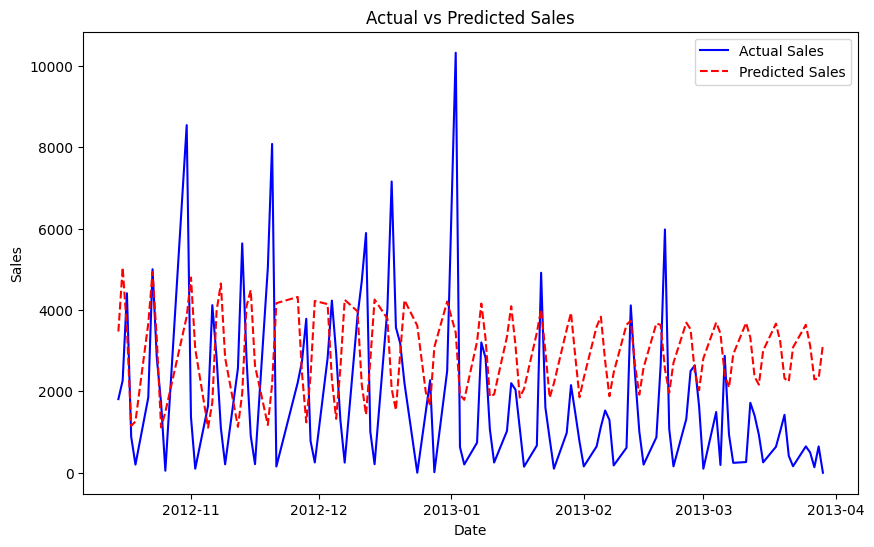

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_df.index.to_timestamp(), test_df[' Daily Sales '], label='Actual Sales', color='blue')
plt.plot(test_df.index.to_timestamp(), predictions_2, label='Predicted Sales', color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()